In [1]:
import gymnasium.utils.seeding
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/3b/55/7192974ab13e5e5577f45d14ce70d42f5a9a686b4f57bbe8c9ab45c4a61a/torch-2.2.2-cp310-none-macosx_10_9_x86_64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/a2/70/c781e0433ab7b8f6f693580e5065ae17c3785b2836200311765f99535ef8/torchvision-0.17.2-cp310-cp310-macosx_10_13_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/76/70/ca793994d37815070f6b53932b71822f66cfb3e197e6937426815998221e/torchaudio-2.2.2-cp310-cp310-macosx_10_13_x86_64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/4d/36/2a115987e2d8c300a974597416d9de88f2444426de9571f4b59b2cca3acc/filelock-3.18.0-py3-none-any.whl.metadata
  Using cached filelock-3.18.0-py3-none-any.whl.met

In [2]:
!pip install stable-baseline3[extra] protobuf==3.20.*

zsh:1: no matches found: stable-baseline3[extra]


In [3]:
!pip install mss pyautogui pytesseract

  Obtaining dependency information for mss from https://files.pythonhosted.org/packages/29/aa/b897ae9e1c1616e4df9fb319637ef6a9d07cca6d46de6b59c80209f006a4/mss-10.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for pydirectinput from https://files.pythonhosted.org/packages/c9/8e/f909defe798270afc2241d3a8986d51459e70c37f02d2ba549627b781b2c/PyDirectInput-1.0.4-py3-none-any.whl.metadata
  Obtaining dependency information for pytesseract from https://files.pythonhosted.org/packages/7a/33/8312d7ce74670c9d39a532b2c246a853861120486be9443eebf048043637/pytesseract-0.3.13-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# chrome://dino/

In [6]:
!pip install opencv-python matplotlib

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/3b/84/0a67490741867eacdfa37bc18df96e08a9d579583b419010d7f3da8ff503/opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_x86_64.whl.metadata
  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_x86_64.whl.metadata (20 kB)
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ee/b1/f70e27cf1cd76ce2a5e1aa5579d05afe3236052c6d9b9a96325bc823a17e/matplotlib-3.10.1-cp310-cp310-macosx_10_12_x86_64.whl.metadata
  Using cached matplotlib-3.10.1-cp310-cp310-macosx_10_12_x86_64.whl.metadata (11 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 3.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/b2/a3/80937fe3efe0edacf67c9a20b955139a1a62

In [21]:
!pip install gymnasium


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [61]:
from mss import mss
import pyautogui
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import time
import gymnasium
from gymnasium import Env
from gymnasium.spaces import Box, Discrete

In [48]:
pyautogui.size()

Size(width=2048, height=1280)

In [167]:
class WebGame(Env):
    def __init__(self):
        super().__init__()
        # Setup spaces
        self.observation_space = Box(low=0, high=255, shape=(1,83,100), dtype=np.uint8)
        self.action_space = Discrete(3)
        # Capture game frames
        self.cap = mss()
        self.game_location = {'top': 200, 'left': 180, 'width': 200, 'height': 150}
        self.done_location = {'top': 220, 'left': 370, 'width': 220, 'height': 35}

    def step(self, action):
        action_map = {
            0:'space',
            1: 'down',
            2: 'no_op'
        }
        if action !=2:
            pyautogui.press(action_map[action])

        done, done_cap = self.get_done()
        observation = self.get_observation()
        reward = 1
        info = {}

        truncated = False
        return observation, reward, done, truncated, info

    def reset(self, seed=None, options=None):
        if seed is not None:
            self.np_random, seed = gymnasium.utils.seeding.np_random(seed)
        time.sleep(1)
        pyautogui.click(x=150, y=150)
        pyautogui.press('space')
        return self.get_observation(), {}

    def render(self):
        cv2.imshow('Game', self.current_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            self.close()

    def close(self):
        cv2.destroyAllWindows()

    def get_observation(self):
        raw = np.array(self.cap.grab(self.game_location))[:,:,:3].astype(np.uint8)
        gray = cv2.cvtColor(raw, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (100,83))
        channel = np.reshape(resized, (1,83,100))
        return channel

    def get_done(self):
        done_cap = np.array(self.cap.grab(self.done_location))
        done_strings = ['GAME', 'GAME OVER']
        done = False
        # if np.sum(done_cap) < 44300000:
        #     done = True
        done = False
        res = pytesseract.image_to_string(done_cap)[:4]
        if res in done_strings:
            done = True
        return done, done_cap

In [168]:
env = WebGame()

In [169]:
obs = env.get_observation()

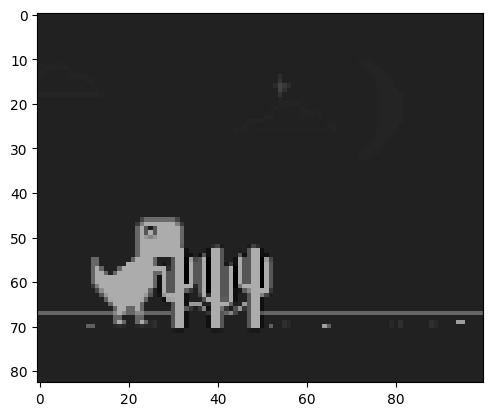

In [170]:
plt.imshow(cv2.cvtColor(obs[0], cv2.COLOR_GRAY2BGR))

In [171]:
done, done_cap = env.get_done()

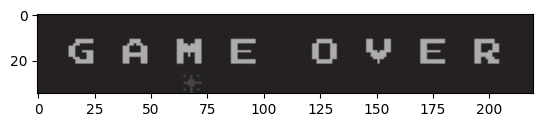

In [172]:
plt.imshow(done_cap)

In [173]:
pytesseract.image_to_string(done_cap)[:9]

'GAME OVER'

In [174]:
done

True

In [175]:
env.action_space.sample()

1

In [95]:
for episode in range(10):
    obs = env.reset()
    done = False
    total_reward = 0
    while not done:
        obs, reward, done, truncated, info = env.step(env.action_space.sample())
        total_reward += reward
    print('Total Reward for epis ode {} is {}'.format(episode, total_reward))

Total Reward for epis ode 0 is 16
Total Reward for epis ode 1 is 16
Total Reward for epis ode 2 is 16
Total Reward for epis ode 3 is 16
Total Reward for epis ode 4 is 16
Total Reward for epis ode 5 is 15
Total Reward for epis ode 6 is 17
Total Reward for epis ode 7 is 22
Total Reward for epis ode 8 is 17
Total Reward for epis ode 9 is 17


In [5]:
!pip install stable-baselines3


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [176]:
import os
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import env_checker

In [156]:
env_checker.check_env(env)

In [177]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self) -> None:
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [178]:
CHECKPOINT_DIR = "./train/"
LOG_DIR = "./logs/"

In [179]:
callback = TrainAndLoggingCallback(check_freq=300, save_path=CHECKPOINT_DIR)

In [180]:
from stable_baselines3 import DQN
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack

In [116]:
env = WebGame()

In [181]:
model = DQN('CnnPolicy', env, tensorboard_log=LOG_DIR, verbose=1, buffer_size=600000, learning_starts=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/Users/hwan/Documents/ml/DinoAI/.venv/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 9.97GB > 5.92GB
  warnings.warn(


In [118]:
model.learn(total_timesteps=300, callback=callback)

Logging to ./logs/DQN_3
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 15.5     |
|    ep_rew_mean      | 15.5     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 2        |
|    time_elapsed     | 27       |
|    total_timesteps  | 62       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.4     |
|    ep_rew_mean      | 14.4     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 2        |
|    time_elapsed     | 52       |
|    total_timesteps  | 115      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 14.8     |
|    ep_rew_mean      | 14.8     |
|    exploration_rate | 0.05     |
| time/               |        

In [133]:
!pip install 'shimmy>=0.2.1'

  Obtaining dependency information for shimmy>=0.2.1 from https://files.pythonhosted.org/packages/4e/e9/64879ed81025b73865a0b6e5668735bf0b71feff5abb6e7a2bee2a1deae9/Shimmy-2.0.0-py3-none-any.whl.metadata

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [162]:
 # model.load('train/best_model_88000')

In [182]:
model = DQN.load(os.path.join('train', 'best_model_88000'))

/Users/hwan/Documents/ml/DinoAI/.venv/lib/python3.10/site-packages/stable_baselines3/common/vec_env/patch_gym.py:95: UserWarning: You loaded a model that was trained using OpenAI Gym. We strongly recommend transitioning to Gymnasium by saving that model again.
  warnings.warn(
/Users/hwan/Documents/ml/DinoAI/.venv/lib/python3.10/site-packages/stable_baselines3/common/buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 19.94GB > 5.83GB
  warnings.warn(
/Users/hwan/Documents/ml/DinoAI/.venv/lib/python3.10/site-packages/stable_baselines3/common/base_class.py:772: UserWarning: You are probably loading a DQN model saved with SB3 < 2.4.0, we truncated the optimizer state so you can save the model again to avoid issues in the future (see https://github.com/DLR-RM/stable-baselines3/pull/1963 for more info). Original error: loaded state dict contains a parameter group that doesn't match the size of optimizer's group 
Note: the mode

In [184]:
for episode in range(5):
    obs, _ = env.reset()
    done = False
    total_reward = 0
    while not done:
        action, _ = model.predict(obs)
        obs, reward, done, truncated, info = env.step(int(action))
        # time.sleep(0.01)
        total_reward += reward
    print('Total Reward for episode {} is {}'.format(episode, total_reward))
    time.sleep(2)

Total Reward for episode 0 is 14
Total Reward for episode 1 is 15
Total Reward for episode 2 is 14
Total Reward for episode 3 is 15
Total Reward for episode 4 is 14
